In [83]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone
import seaborn as sns

In [84]:
uciiono = pd.read_csv("ionosphere_data_kaggle.csv")
print(uciiono.head())
uciiono_features = uciiono.iloc[:, :-1]
uciiono_labels = uciiono.iloc[:, -1]
lb = LabelBinarizer()
uciiono_labels = lb.fit_transform(uciiono_labels) 
uciiono_labels = uciiono_labels.reshape(uciiono_labels.shape[0],)
print(lb.classes_) #b=0, g=1

   feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0         1         0   0.99539  -0.05889   0.85243   0.02306   0.83398   
1         1         0   1.00000  -0.18829   0.93035  -0.36156  -0.10868   
2         1         0   1.00000  -0.03365   1.00000   0.00485   1.00000   
3         1         0   1.00000  -0.45161   1.00000   1.00000   0.71216   
4         1         0   1.00000  -0.02401   0.94140   0.06531   0.92106   

   feature8  feature9  feature10  ...  feature26  feature27  feature28  \
0  -0.37708   1.00000    0.03760  ...   -0.51171    0.41078   -0.46168   
1  -0.93597   1.00000   -0.04549  ...   -0.26569   -0.20468   -0.18401   
2  -0.12062   0.88965    0.01198  ...   -0.40220    0.58984   -0.22145   
3  -1.00000   0.00000    0.00000  ...    0.90695    0.51613    1.00000   
4  -0.23255   0.77152   -0.16399  ...   -0.65158    0.13290   -0.53206   

   feature29  feature30  feature31  feature32  feature33  feature34  label  
0    0.21266   -0.34090    

In [85]:
def standardise_dataset(X_train, X_test, y_train, y_test):
    X_train_norm = X_train.copy()
    X_test_norm = X_test.copy()

    normalizer = StandardScaler().fit(X_train)
    X_train_norm = pd.DataFrame(normalizer.transform(X_train), columns=X_train.columns)
    X_test_norm = pd.DataFrame(normalizer.transform(X_test), columns=X_test.columns)
    
    return (X_train_norm, X_test_norm, pd.Series(y_train), pd.Series(y_test))

In [86]:
X_train, X_test, y_train, y_test = train_test_split(uciiono_features, uciiono_labels, test_size=0.1 ,random_state=0)
X_train.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
76,1,0,1.00000,0.04078,1.00000,0.11982,1.00000,0.16159,1.00000,0.27921,...,0.67077,0.59723,0.58903,0.60990,0.53952,0.60932,0.45312,0.63636,0.40442,0.62658
198,1,0,0.36876,-1.00000,-1.00000,-1.00000,-0.07661,1.00000,1.00000,0.95041,...,0.03021,0.06639,0.03443,-0.01186,-0.00403,-0.01672,-0.00761,0.00108,0.00015,0.00325
171,1,0,1.00000,0.00000,1.00000,0.00000,0.66667,0.11111,1.00000,-0.11111,...,0.66667,0.00000,0.90347,-0.05352,1.00000,0.11111,0.88889,-0.11111,1.00000,0.00000
20,1,0,1.00000,-0.00612,1.00000,-0.09834,1.00000,-0.07649,1.00000,-0.10605,...,0.81874,-0.40372,0.82681,-0.42231,0.75784,-0.38231,0.80448,-0.40575,0.74354,-0.45039
281,1,0,0.94331,0.19959,0.96132,0.40803,0.80514,0.56569,0.56687,0.70830,...,-0.68851,0.30912,-0.77097,0.15619,-0.75406,-0.04399,-0.75199,-0.17921,-0.66932,-0.34367


1. Mean and variance for all independent variables in the training set. f_ind variable has the top 5 features with the highest variance.

In [87]:
#Mean and variance for all independent variables in the training dataset
means = X_train.mean(axis=0)
variances = X_train.var(axis=0)
f_ind = np.argpartition(variances, -5)[-5:]
print("Mean and variance for all independent features in the UCI Ionosphere dataset: \n")
for i in range(len(means)):
    print("Mean of feature", i+1, ": ", means[i])
    print("Variance of feature", i+1, ": ", variances[i], "\n")

Mean and variance for all independent features in the UCI Ionosphere dataset: 

Mean of feature 1 :  0.8920634920634921
Variance of feature 1 :  0.09659286219795775 

Mean of feature 2 :  0.0
Variance of feature 2 :  0.0 

Mean of feature 3 :  0.6308179365079365
Variance of feature 3 :  0.2602032881259832 

Mean of feature 4 :  0.03464301587301588
Variance of feature 4 :  0.1911938292835507 

Mean of feature 5 :  0.6055236825396825
Variance of feature 5 :  0.258096742394039 

Mean of feature 6 :  0.11338358730158729
Variance of feature 6 :  0.2080500373377272 

Mean of feature 7 :  0.5580497142857143
Variance of feature 7 :  0.23625978871424932 

Mean of feature 8 :  0.11812219047619046
Variance of feature 8 :  0.27579562964837123 

Mean of feature 9 :  0.5082888888888889
Variance of feature 9 :  0.2588541226283793 

Mean of feature 10 :  0.18534961904761904
Variance of feature 10 :  0.23705533713807098 

Mean of feature 11 :  0.4723110476190477
Variance of feature 11 :  0.311303018389

1. Histograms and boxplots for the 5 features having the highest variance

Features with higest variance: 

Variance of feature 21 :  0.37153949731725205


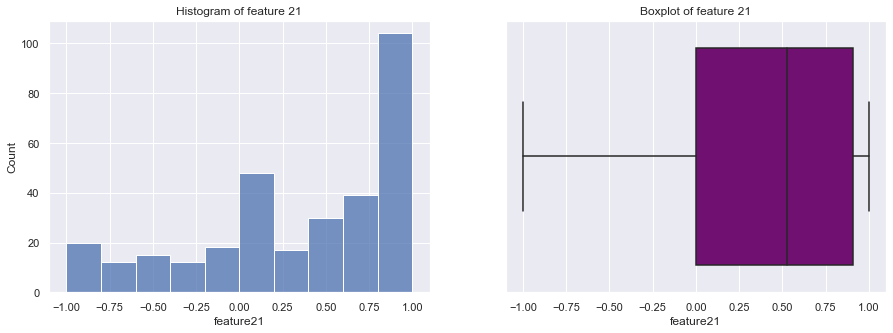

Variance of feature 13 :  0.3873872994764897


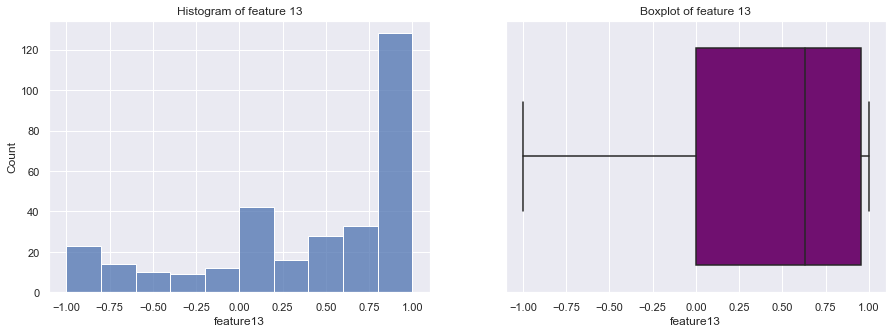

Variance of feature 17 :  0.38745071012379334


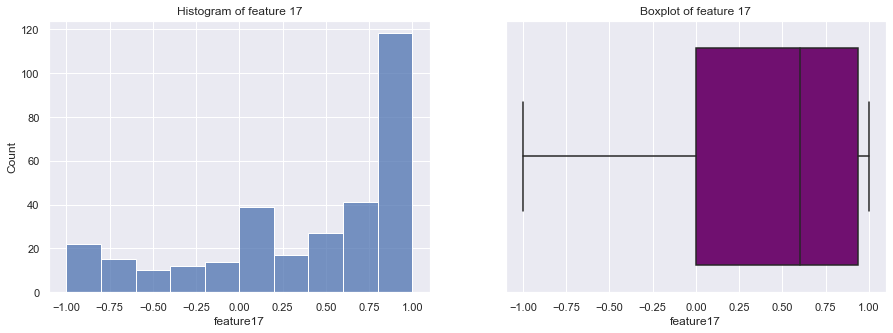

Variance of feature 19 :  0.3947847416181438


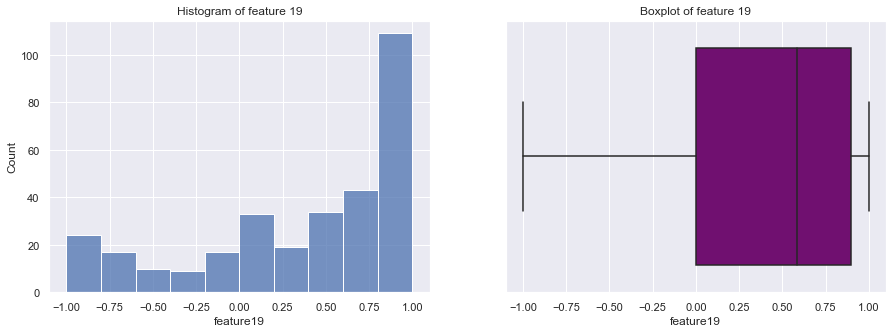

Variance of feature 15 :  0.4247939809541361


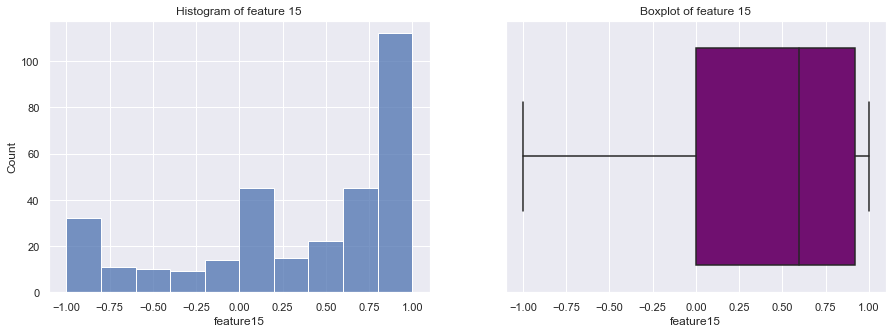

In [88]:
print("Features with higest variance: \n")
sns.set()
for i in f_ind:
    fig, axis = plt.subplots(1,2, figsize=(15,5))
    print("Variance of feature", i+1, ": ", variances[i])
    sns.histplot(x = X_train.iloc[:, i], ax=axis[0])
    sns.boxplot(x = X_train.iloc[:, i], ax=axis[1], color="purple")
    axis[0].set_title("Histogram of feature " + str(i+1))
    axis[1].set_title("Boxplot of feature " + str(i+1))
    plt.show()

In [89]:
#feature standardisation:
X_train, X_test, y_train, y_test = standardise_dataset(X_train, X_test, y_train, y_test)
kf = KFold(n_splits=5, shuffle=False, random_state=None)
print(X_train.head())
print(y_train.head())

   feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0  0.347845       0.0  0.724894  0.014058  0.777714  0.014134  0.910687   
1  0.347845       0.0 -0.514554 -2.369977 -3.165308 -2.444845 -1.307785   
2  0.347845       0.0  0.724894 -0.079354  0.777714 -0.248976  0.223824   
3  0.347845       0.0  0.724894 -0.093373  0.777714 -0.464917  0.910687   
4  0.347845       0.0  0.613583  0.377831  0.701456  0.647005  0.509156   

   feature8  feature9  feature10  ...  feature25  feature26  feature27  \
0  0.082902  0.967995   0.193085  ...   0.454052   1.327301   0.090143   
1  1.681919  0.967995   1.573843  ...  -0.660788   0.273190  -0.977502   
2 -0.013374  0.967995  -0.609861  ...   0.446916   0.141356   0.695462   
3 -0.371165  0.967995  -0.599452  ...   0.711581  -0.660328   0.547886   
4  0.853602  0.115324   1.075786  ...  -1.911659   0.755189  -2.527955   

   feature28  feature29  feature30  feature31  feature32  feature33  feature34  
0   1.247680   0.252689

In [90]:
def perform_kfold_cv(modell, X, y):
    maxf1 = 0
    opt_model = None
    i=0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = clone(modell)
        model.fit(X_train, y_train)  #new model instance is being used everytime
        y_pred = model.predict(X_test)
        print("Accuracy of fold", i+1, ": ", metrics.accuracy_score(y_test, y_pred))
        print("Precision of fold", i+1, ": ", metrics.precision_score(y_test, y_pred))
        print("Recall of fold", i+1, ": ", metrics.recall_score(y_test, y_pred))
        print("F1 score of fold", i+1, ": ", metrics.f1_score(y_test, y_pred))
        print("------------------------------------------------------")
        i+=1
        if metrics.f1_score(y_test, y_pred) > maxf1:
            maxf1 = metrics.f1_score(y_test, y_pred)
            opt_model = model
    return opt_model, maxf1

1. Binary Logistic Regression on the dataset without regularisation:

In [91]:
'''Binary Logistic Regression'''
lr = LogisticRegression(penalty='none', max_iter=10000, solver='saga') 
opt_lr, _ = perform_kfold_cv(lr, X_train, y_train)
y_pred = opt_lr.predict(X_test)
y_pred_prob = opt_lr.predict_proba(X_test)
print("Accuracy of the best Logistic Regression model from kfold cv on test dataset: ", metrics.accuracy_score(y_test, y_pred))
print("Precision of the best Logistic Regression model from kfold cv on test dataset: ", metrics.precision_score(y_test, y_pred))
print("Recall of the best Logistic Regression model from kfold cv on test dataset: ", metrics.recall_score(y_test, y_pred))
print("F1 score of the best Logistic Regression model from kfold cv on test dataset: ", metrics.f1_score(y_test, y_pred))


Accuracy of fold 1 :  0.8571428571428571
Precision of fold 1 :  0.825
Recall of fold 1 :  0.9428571428571428
F1 score of fold 1 :  0.88
------------------------------------------------------
Accuracy of fold 2 :  0.8253968253968254
Precision of fold 2 :  0.8095238095238095
Recall of fold 2 :  0.918918918918919
F1 score of fold 2 :  0.860759493670886
------------------------------------------------------
Accuracy of fold 3 :  0.873015873015873
Precision of fold 3 :  0.8918918918918919
Recall of fold 3 :  0.8918918918918919
F1 score of fold 3 :  0.8918918918918919
------------------------------------------------------
Accuracy of fold 4 :  0.873015873015873
Precision of fold 4 :  0.9148936170212766
Recall of fold 4 :  0.9148936170212766
F1 score of fold 4 :  0.9148936170212766
------------------------------------------------------
Accuracy of fold 5 :  0.8412698412698413
Precision of fold 5 :  0.8775510204081632
Recall of fold 5 :  0.9148936170212766
F1 score of fold 5 :  0.8958333333333

(a) Bonus Question: PCA

In [92]:
'''To choose: the best model after performing PCA at various levels of variance'''
v_values = np.linspace(0.9, 1, 11)
opt_pca = None
opt_lr = None
maxf1_pca = 0
pca_preds = None
for i in v_values:
    if i == 1:
        pca = PCA(1) #it asked to use integer value when 1 is being passed.
    else:
        pca = PCA(i)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    print("variance value used: ", i)
    m, f1 = perform_kfold_cv(clone(lr), pd.DataFrame(X_train_pca), pd.Series(y_train))
    print("------------------------------------------------------")
    if f1 > maxf1_pca:
        maxf1_pca = f1
        opt_pca = pca
        opt_lr = m
        pca_preds = opt_lr.predict(pd.DataFrame(X_test_pca))

variance value used:  0.9
Accuracy of fold 1 :  0.8571428571428571
Precision of fold 1 :  0.825
Recall of fold 1 :  0.9428571428571428
F1 score of fold 1 :  0.88
------------------------------------------------------
Accuracy of fold 2 :  0.8888888888888888
Precision of fold 2 :  0.8571428571428571
Recall of fold 2 :  0.972972972972973
F1 score of fold 2 :  0.9113924050632912
------------------------------------------------------
Accuracy of fold 3 :  0.9047619047619048
Precision of fold 3 :  0.8974358974358975
Recall of fold 3 :  0.9459459459459459
F1 score of fold 3 :  0.9210526315789475
------------------------------------------------------
Accuracy of fold 4 :  0.8412698412698413
Precision of fold 4 :  0.8775510204081632
Recall of fold 4 :  0.9148936170212766
F1 score of fold 4 :  0.8958333333333333
------------------------------------------------------
Accuracy of fold 5 :  0.7936507936507936
Precision of fold 5 :  0.8541666666666666
Recall of fold 5 :  0.8723404255319149
F1 score

In [93]:
print("Optimal PCA model: ", opt_pca, "\tF1 score: ", maxf1_pca)
#create a dataframe of performance metrics
metrics_df = pd.DataFrame(columns=["Method", "Accuracy", "Precision", "Recall", "F1 score"])
metrics_df.loc[0] = ["No PCA", metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred), metrics.f1_score(y_test, y_pred)]
metrics_df.loc[1] = ["PCA", metrics.accuracy_score(y_test, pca_preds), metrics.precision_score(y_test, pca_preds), metrics.recall_score(y_test, pca_preds), metrics.f1_score(y_test, pca_preds)]
print("\nPerformance comparison of the best LR model with and without PCA with optimal variance on the test dataset:")
print(metrics_df)

Optimal PCA model:  PCA(n_components=0.91) 	F1 score:  0.9473684210526315

Performance comparison of the best LR model with and without PCA with optimal variance on the test dataset:
   Method  Accuracy  Precision    Recall  F1 score
0  No PCA  0.944444   0.954545  0.954545  0.954545
1     PCA  0.916667   0.913043  0.954545  0.933333


(b) Comparison of logistic regression with l1 and l2 regularisation and without regularisation on test set

In [94]:
#logistic regression with l1 regularization, get optimal model object
lr_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)
opt_lr_l1, _ = perform_kfold_cv(clone(lr_l1), X_train, y_train)
y_pred_l1 = opt_lr_l1.predict(X_test)
y_pred_prob_l1 = opt_lr_l1.predict_proba(X_test)

Accuracy of fold 1 :  0.873015873015873
Precision of fold 1 :  0.8292682926829268
Recall of fold 1 :  0.9714285714285714
F1 score of fold 1 :  0.8947368421052632
------------------------------------------------------
Accuracy of fold 2 :  0.8571428571428571
Precision of fold 2 :  0.8043478260869565
Recall of fold 2 :  1.0
F1 score of fold 2 :  0.891566265060241
------------------------------------------------------
Accuracy of fold 3 :  0.9365079365079365
Precision of fold 3 :  0.9230769230769231
Recall of fold 3 :  0.972972972972973
F1 score of fold 3 :  0.9473684210526315
------------------------------------------------------
Accuracy of fold 4 :  0.8253968253968254
Precision of fold 4 :  0.875
Recall of fold 4 :  0.8936170212765957
F1 score of fold 4 :  0.8842105263157894
------------------------------------------------------
Accuracy of fold 5 :  0.8888888888888888
Precision of fold 5 :  0.9
Recall of fold 5 :  0.9574468085106383
F1 score of fold 5 :  0.9278350515463918
-----------

In [95]:
#logistic regression with l2 regularization
lr_l2 = LogisticRegression(penalty='l2', solver='saga', max_iter=10000)
opt_lr_l2, _ = perform_kfold_cv(clone(lr_l2), X_train, y_train) #new model instance passed
y_pred_l2 = opt_lr_l2.predict(X_test)
y_pred_prob_l2 = opt_lr_l2.predict_proba(X_test)

Accuracy of fold 1 :  0.9047619047619048
Precision of fold 1 :  0.8717948717948718
Recall of fold 1 :  0.9714285714285714
F1 score of fold 1 :  0.9189189189189189
------------------------------------------------------
Accuracy of fold 2 :  0.8412698412698413
Precision of fold 2 :  0.7872340425531915
Recall of fold 2 :  1.0
F1 score of fold 2 :  0.880952380952381
------------------------------------------------------
Accuracy of fold 3 :  0.9206349206349206
Precision of fold 3 :  0.9
Recall of fold 3 :  0.972972972972973
F1 score of fold 3 :  0.935064935064935
------------------------------------------------------
Accuracy of fold 4 :  0.8412698412698413
Precision of fold 4 :  0.8775510204081632
Recall of fold 4 :  0.9148936170212766
F1 score of fold 4 :  0.8958333333333333
------------------------------------------------------
Accuracy of fold 5 :  0.8571428571428571
Precision of fold 5 :  0.8653846153846154
Recall of fold 5 :  0.9574468085106383
F1 score of fold 5 :  0.909090909090909

In [96]:
#create a dataframe of performance metrics
metrics_reg_df = pd.DataFrame(columns=["Penalty", "Accuracy", "Precision", "Recall", "F1 score"])
metrics_reg_df.loc[0] = ["none", metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred), metrics.f1_score(y_test, y_pred)]
metrics_reg_df.loc[1] = ["l1", metrics.accuracy_score(y_test, y_pred_l1), metrics.precision_score(y_test, y_pred_l1), metrics.recall_score(y_test, y_pred_l1), metrics.f1_score(y_test, y_pred_l1)]
metrics_reg_df.loc[2] = ["l2", metrics.accuracy_score(y_test, y_pred_l2), metrics.precision_score(y_test, y_pred_l2), metrics.recall_score(y_test, y_pred_l2), metrics.f1_score(y_test, y_pred_l2)]
print(metrics_reg_df)

  Penalty  Accuracy  Precision    Recall  F1 score
0    none  0.944444   0.954545  0.954545  0.954545
1      l1  0.972222   0.956522  1.000000  0.977778
2      l2  0.944444   0.916667  1.000000  0.956522


**Note: In the following sections, all ROC curves are found for the class '1' ie. 'g'.**

(c) ROC-AUC from scratch

In [97]:
def calculate_true_pos_false_pos_rate(ground_truth, predictions):
    #find true positive, false positive, true negative, false negative
    tp = (ground_truth==1) & (predictions==1)
    fp = (ground_truth==0) & (predictions==1)
    tn = (ground_truth==0) & (predictions==0)
    fn = (ground_truth==1) & (predictions==0)
    tpr = tp.sum() / (tp.sum() + fn.sum())
    fpr = fp.sum() / (fp.sum() + tn.sum())
    return tpr, fpr

In [98]:
def return_roc_curve(ground_truth, predicted_probs):
    thresholds = np.linspace(0, 1, 11)
    tprs = []
    fprs = []
    for i in thresholds:
        pred = predicted_probs.copy()
        thresh_mask = pred >= i
        pred[thresh_mask]=1 #classify as 1 if probabilty is greater than or equal to threshold
        pred[~thresh_mask]=0 #classify as 0 if probabilty is less than threshold
        tpr, fpr = calculate_true_pos_false_pos_rate(ground_truth.reshape(1,-1), pred.reshape(1,-1))
        tprs.append(tpr)
        fprs.append(fpr)
    return tprs, fprs

Note: I have displayed individual ROC curves also just for the sake of showing the area under them. I have also displayed all the ROC curves on the same graph as asked by the question.

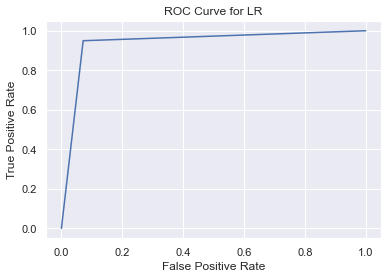

Area under curve using trapezoidal rule:  0.9594155844155845


In [99]:
tprs, fprs = return_roc_curve(y_test.to_numpy(), y_pred_prob[:,1])
sns.set()
sns.lineplot(x=fprs, y=tprs, err_style=None)
plt.title('ROC Curve for LR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print("Area under curve using trapezoidal rule: ", np.trapz(np.flip(tprs), np.flip(fprs)))

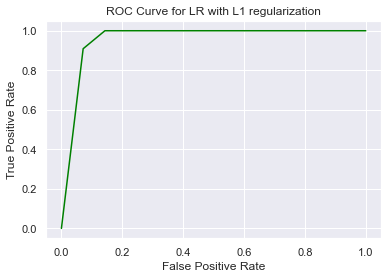

Area under curve using trapezoidal rule:  0.9561688311688311


In [100]:
tprs_l1, fprs_l1 = return_roc_curve(y_test.to_numpy(), y_pred_prob_l1[:,1])
sns.set()
sns.lineplot(x=fprs_l1, y=tprs_l1, color='green', err_style=None)
plt.title('ROC Curve for LR with L1 regularization')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print("Area under curve using trapezoidal rule: ", np.trapz(np.flip(tprs_l1), np.flip(fprs_l1)))

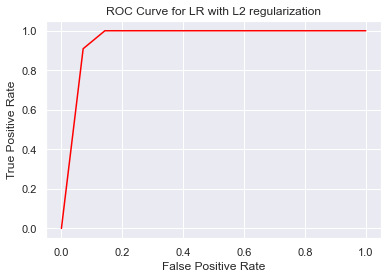

Area under curve using trapezoidal rule:  0.9561688311688311


In [107]:
tprs_l2, fprs_l2 = return_roc_curve(y_test.to_numpy(), y_pred_prob_l2[:,1])
sns.set()
sns.lineplot(x=fprs_l2, y=tprs_l2, color='red', err_style=None)
plt.title('ROC Curve for LR with L2 regularization')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print("Area under curve using trapezoidal rule: ", np.trapz(np.flip(tprs_l2), np.flip(fprs_l2)))

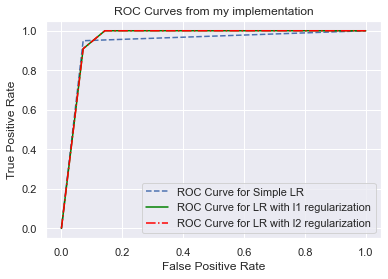

In [113]:
#Plot them all together
sns.lineplot(x=fprs, y=tprs, label='ROC Curve for Simple LR', err_style=None, linestyle='--')
sns.lineplot(x=fprs_l1, y=tprs_l1, color='green', label='ROC Curve for LR with l1 regularization', err_style=None, linestyle='solid')
sns.lineplot(x=fprs_l2, y=tprs_l2, color='red', label='ROC Curve for LR with l2 regularization', err_style=None, linestyle='dashdot')
plt.title('ROC Curves from my implementation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [105]:
#print the prespective true positive rates and false positive rates for each model:
print("True positive rates for simple LR at given threshold values: ", tprs)
print("False positive rates for simple LR at given threshold values: ", fprs)
print("-------------------------------------------------------")
print("True positive rates for LR with l1 regularization at given threshold values: ", tprs_l1)
print("False positive rates for LR with l1 regularization at given threshold values: ", fprs_l1)
print("-------------------------------------------------------")
print("True positive rates for LR with l2 regularization at given threshold values: ", tprs_l2)
print("False positive rates for LR with l2 regularization at given threshold values: ", fprs_l2)


True positive rates for simple LR at given threshold values:  [1.0, 1.0, 0.9545454545454546, 0.9545454545454546, 0.9545454545454546, 0.9545454545454546, 0.9545454545454546, 0.9545454545454546, 0.9545454545454546, 0.8636363636363636, 0.0]
False positive rates for simple LR at given threshold values:  [1.0, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.0]
-------------------------------------------------------
True positive rates for LR with l1 regularization at given threshold values:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9545454545454546, 0.9545454545454546, 0.8636363636363636, 0.7727272727272727, 0.0]
False positive rates for LR with l1 regularization at given threshold values:  [1.0, 0.35714285714285715, 0.21428571428571427, 0.21428571428571427, 0.14285714285714285, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.071428571428571

*Note: If the resolution of threshold values is increased to about a 1000 or so, it can be seen that the area under these roc curves approach the true ROC AUC values reported by sklearn.*

(d) ROC-AUC Curve using sklearn

Area under curve using sklearn's roc_auc_score function:  0.961038961038961


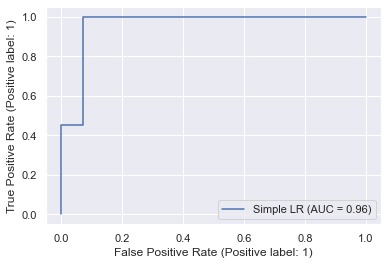

Area under curve using sklearn's roc_auc_score function:  0.974025974025974


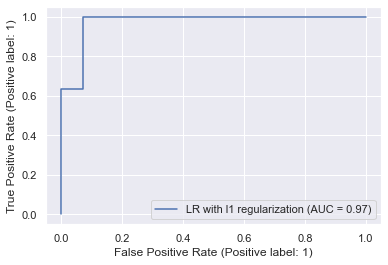

Area under curve using sklearn's roc_auc_score function:  0.974025974025974


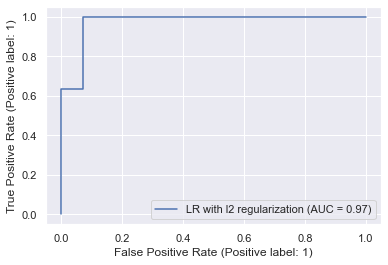

In [103]:
#ROC curve
y_pred_prob1 = y_pred_prob[:,1] #probability of the positive outcome only i.e. class 1
y_pred_prob1_l1 = y_pred_prob_l1[:,1]
y_pred_prob1_l2 = y_pred_prob_l2[:,1]
sns.set()
#use sklearn's roc_auc_score function to calculate the area under the curve
metrics.RocCurveDisplay.from_predictions(y_test, y_pred_prob1, name='Simple LR')
print("Area under curve using sklearn's roc_auc_score function: ", metrics.roc_auc_score(y_test, y_pred_prob1))
plt.show()
metrics.RocCurveDisplay.from_predictions(y_test, y_pred_prob1_l1, name='LR with l1 regularization')
print("Area under curve using sklearn's roc_auc_score function: ", metrics.roc_auc_score(y_test, y_pred_prob1_l1))
plt.show()
metrics.RocCurveDisplay.from_predictions(y_test, y_pred_prob1_l2, name='LR with l2 regularization')
print("Area under curve using sklearn's roc_auc_score function: ", metrics.roc_auc_score(y_test, y_pred_prob1_l2))
plt.show()

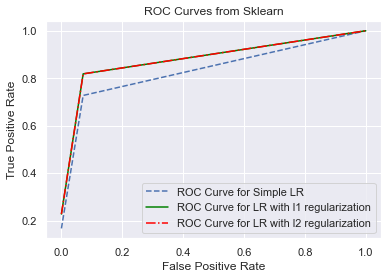

In [114]:
#Plotting them together
sns.set()
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob1)
fpr_l1, tpr_l1, thresholds_l1 = metrics.roc_curve(y_test, y_pred_prob1_l1)
fpr_l2, tpr_l2, thresholds_l2 = metrics.roc_curve(y_test, y_pred_prob1_l2)
sns.lineplot(x=fpr, y=tpr, label='ROC Curve for Simple LR', err_style=None, linestyle='--')
sns.lineplot(x=fpr_l1, y=tpr_l1, color='green', label='ROC Curve for LR with l1 regularization', err_style=None, linestyle='solid')
sns.lineplot(x=fpr_l2, y=tpr_l2, color='red', label='ROC Curve for LR with l2 regularization', err_style=None, linestyle='dashdot')
plt.title('ROC Curves from Sklearn')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
